In [ ]:
from matplotlib import pyplot as plt
import numpy as np

from PIL import Image
import keras

from keras.layers import InputLayer, Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import InputLayer, Dense
import pathlib

In [3]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
print(data_dir)

C:\Users\dell 5420\.keras\datasets\flower_photos


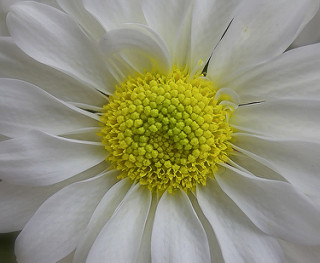

In [52]:
roses = list(data_dir.glob('daisy/*'))
Image.open(roses[0])

In [7]:
img_height,img_width=180,180
batch_size=32
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
     

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


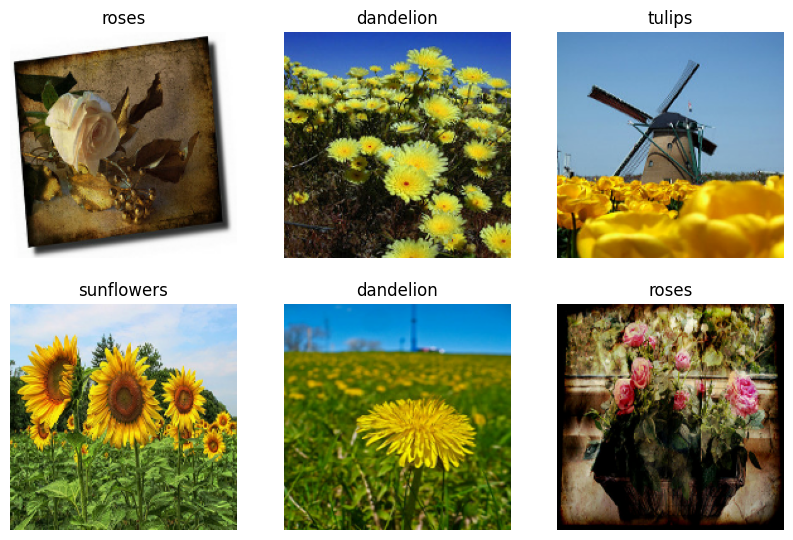

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# from tensorflow.keras.applications import ResNet50V2


In [28]:
pre_trained = keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(180, 180, 3),
    pooling='avg',
    name="resnet50v2",
)

for layer in pre_trained.layers:
        layer.trainable=False


transfer_model = Sequential([
        InputLayer(shape=(180, 180, 3)),
        pre_trained,

        Flatten(),
        Dense(512, activation='relu'),
        Dense(5, activation='softmax')

])

transfer_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 2048)           │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,616,453 (93.90 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [33]:
transfer_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [44]:
epochs=10
history = transfer_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.5563 - loss: 3.9955 - val_accuracy: 0.4087 - val_loss: 5.1295
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.5738 - loss: 2.9257 - val_accuracy: 0.3924 - val_loss: 4.9978
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.5501 - loss: 3.4523 - val_accuracy: 0.4605 - val_loss: 4.9581
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.6026 - loss: 2.4814 - val_accuracy: 0.5272 - val_loss: 2.9897
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.5957 - loss: 2.1177 - val_accuracy: 0.4428 - val_loss: 3.3512
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.6413 - loss: 1.5547 - val_accuracy: 0.4782 - val_loss: 2.7051
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.6364 - loss: 1.6219 - val_accuracy: 0.5272 - val_loss: 2.5507
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.6221 - loss: 1.6780 - val_accuracy: 0.5381 - v

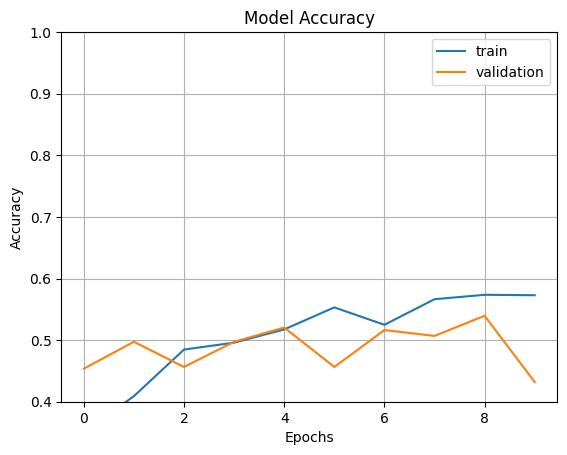

In [35]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

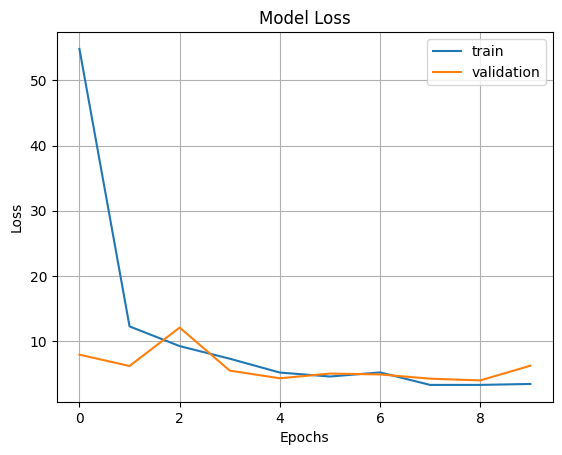

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

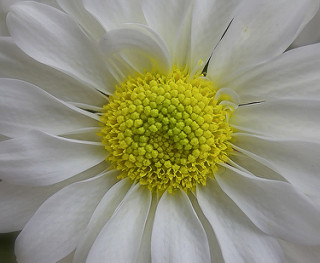

In [53]:
Image.open(roses[0])

In [54]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [55]:
pred=transfer_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[0.34480646 0.00093602 0.63615245 0.00635324 0.01175186]]


In [57]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
